# World Weather EDA

By Jose Castillo-Flores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('data/GlobalWeatherRepository.csv')

In [3]:
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       585 non-null    object 
 1   location_name                 585 non-null    object 
 2   latitude                      585 non-null    float64
 3   longitude                     585 non-null    float64
 4   timezone                      585 non-null    object 
 5   last_updated_epoch            585 non-null    int64  
 6   last_updated                  585 non-null    object 
 7   temperature_celsius           585 non-null    float64
 8   temperature_fahrenheit        585 non-null    float64
 9   condition_text                585 non-null    object 
 10  wind_mph                      585 non-null    float64
 11  wind_kph                      585 non-null    float64
 12  wind_degree                   585 non-null    int64  
 13  wind_

In [5]:
# Selecting only the columns that I'll be using for EDA

df = data.iloc[:, [0, 1, 4, 8, 9, 10, 18, 21, 24, 27, 28]]

In [6]:
df.head()

,country,location_name,timezone,temperature_fahrenheit,condition_text,wind_mph,humidity,feels_like_fahrenheit,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone
0,Afghanistan,Kabul,Asia/Kabul,83.8,Sunny,7.2,19,80.1,7.0,647.5,130.2
1,Albania,Tirana,Europe/Tirane,80.6,Partly cloudy,3.8,54,82.3,6.0,433.9,104.4
2,Algeria,Algiers,Africa/Algiers,82.4,Partly cloudy,8.1,30,81.3,7.0,647.5,16.6
3,Andorra,Andorra La Vella,Europe/Andorra,50.4,Sunny,6.0,51,48.0,4.0,190.3,68.0
4,Angola,Luanda,Africa/Luanda,77.0,Partly cloudy,2.2,69,80.4,6.0,2136.2,147.3


In [7]:
df.describe()

,temperature_fahrenheit,wind_mph,humidity,feels_like_fahrenheit,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000
mean,73.271966,7.135897,72.400000,76.602564,3.138462,444.642222,44.990427
std,12.298004,4.622086,20.874888,16.317462,2.712788,713.024292,38.566833
min,37.200000,2.200000,6.000000,33.400000,1.000000,123.500000,0.000000
25%,64.400000,3.800000,60.000000,64.400000,1.000000,213.600000,20.200000
50%,75.200000,5.800000,78.000000,78.100000,1.000000,260.400000,36.100000
75%,82.400000,9.400000,89.000000,87.100000,6.000000,410.600000,60.100000
max,113.000000,30.000000,100.000000,164.400000,10.000000,7370.000000,320.400000


In [8]:
# Making sure there are no NA values

df.isna().sum()

country                        0
location_name                  0
timezone                       0
temperature_fahrenheit         0
condition_text                 0
wind_mph                       0
humidity                       0
feels_like_fahrenheit          0
uv_index                       0
air_quality_Carbon_Monoxide    0
air_quality_Ozone              0
dtype: int64

<Axes: title={'center': 'Top 5 Weather Conditions'}>

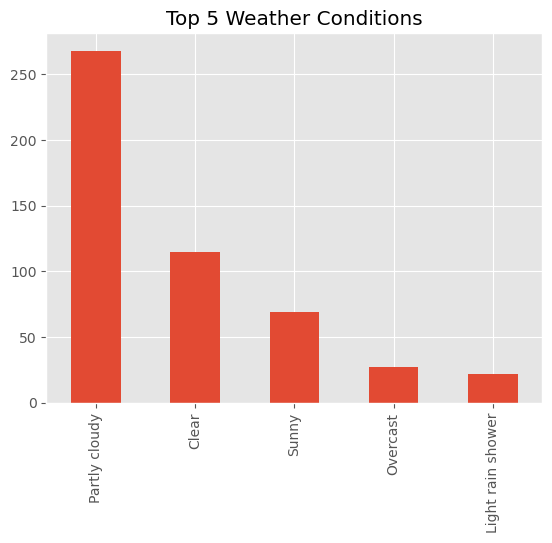

In [9]:
df['condition_text'].value_counts().head().plot(kind='bar', title= 'Top 5 Weather Conditions')

Text(0, 0.5, 'Count')

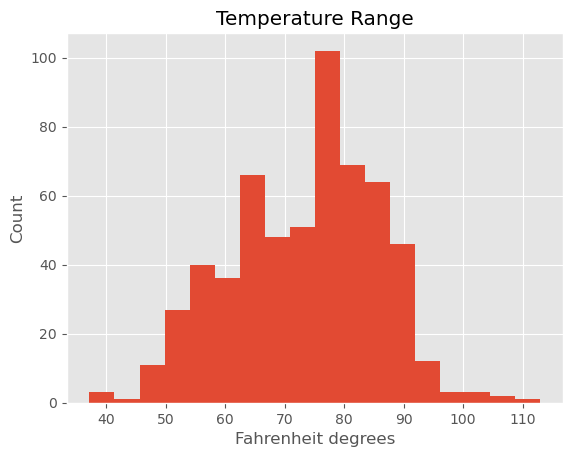

In [10]:
ax = df['temperature_fahrenheit'].plot(kind = 'hist', bins=18, title= 'Temperature Range')

ax.set_xlabel('Fahrenheit degrees')
ax.set_ylabel('Count')

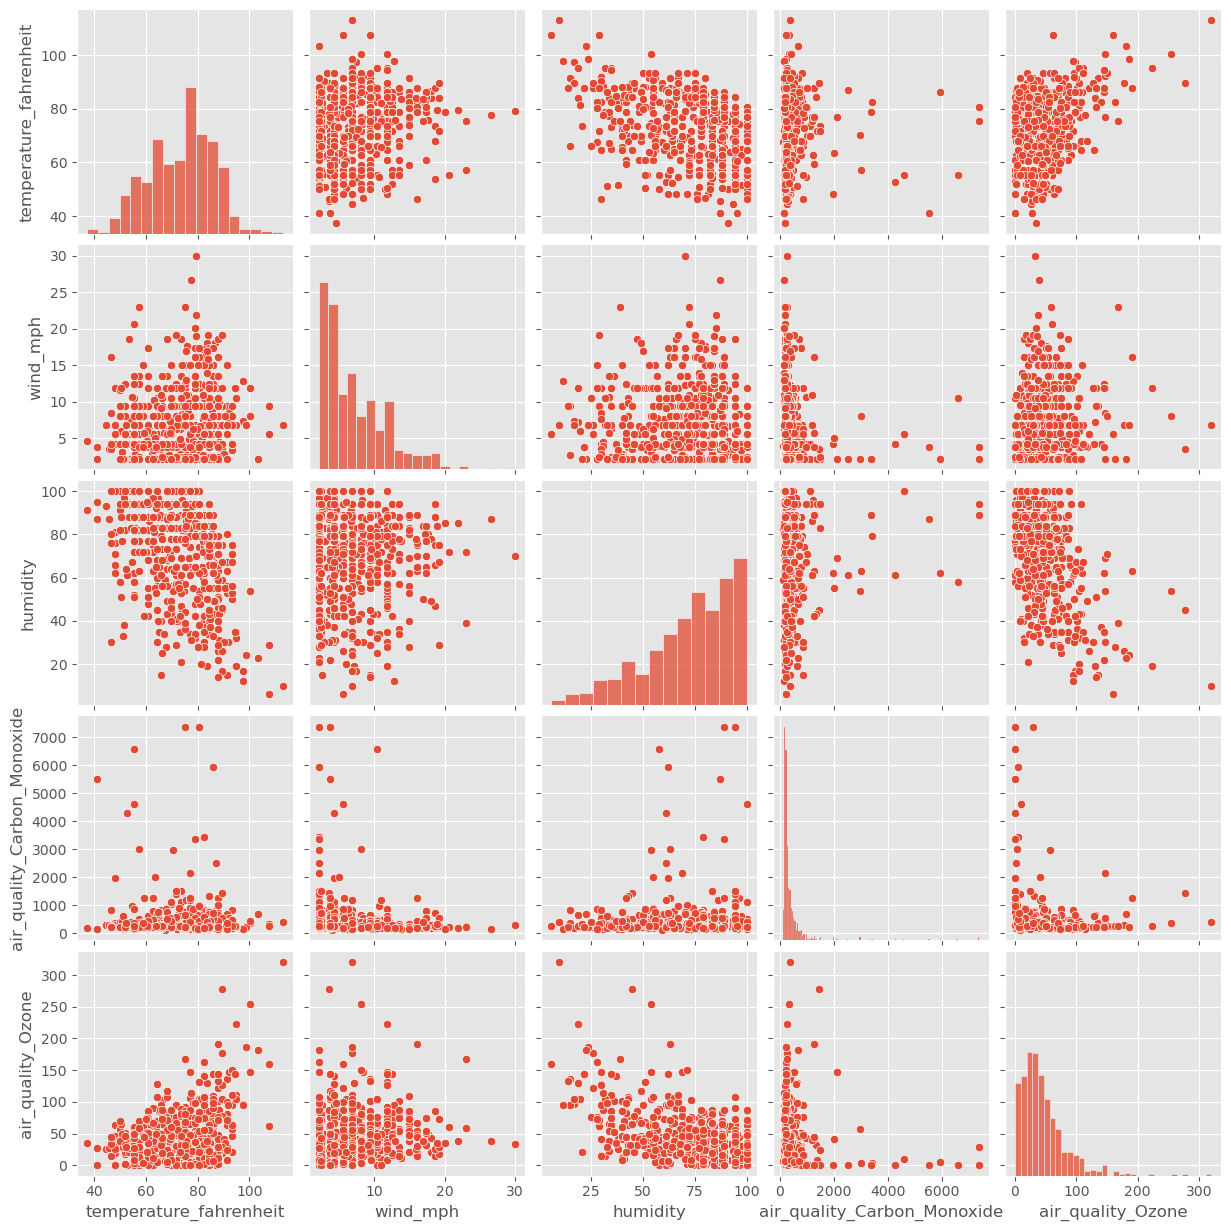

In [11]:
# Making a paiplot graph to look at some correlations between features

sns.pairplot(df, vars = ['temperature_fahrenheit', 'wind_mph', 'humidity', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone'])

In [12]:
# Looking at the top 10 hottest places

df.sort_values(by='temperature_fahrenheit', ascending=False).head(10)

,country,location_name,timezone,temperature_fahrenheit,condition_text,wind_mph,humidity,feels_like_fahrenheit,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone
184,United Arab Emirates,Abu Dhabi,Asia/Dubai,113.0,Sunny,6.9,10,164.4,9.0,390.5,320.4
47,Djibouti,Djibouti,Africa/Djibouti,107.6,Mist,9.4,29,138.3,9.0,347.1,61.5
151,Saudi Arabia,Riyadh,Asia/Riyadh,107.6,Sunny,5.6,6,109.3,10.0,253.7,160.2
90,Kuwait,Kuwait City,Asia/Kuwait,103.3,Sunny,2.2,23,104.5,9.0,687.6,181.7
12,Bahrain,Manama,Asia/Bahrain,100.4,Sunny,8.1,54,118.1,9.0,360.5,254.6
141,Qatar,Doha,Asia/Qatar,100.4,Sunny,11.9,54,108.7,9.0,427.3,147.3
80,Iraq,Baghdad,Asia/Baghdad,98.6,Sunny,6.9,24,96.3,9.0,220.3,186.0
112,Russia,Chi-Chi-Erh,Asia/Krasnoyarsk,97.7,Overcast,12.8,12,95.2,8.0,163.6,94.4
37,Bulgaria,Bogot,Europe/Sofia,97.5,Sunny,7.4,17,95.0,9.0,201.9,97.3
43,Cyprus,Nicosia,Asia/Nicosia,95.0,Partly cloudy,6.9,35,98.8,8.0,233.7,110.2


In [13]:
# Now top 10 coldest

df.sort_values(by='temperature_fahrenheit', ascending=True).head(10)

,country,location_name,timezone,temperature_fahrenheit,condition_text,wind_mph,humidity,feels_like_fahrenheit,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone
198,Andorra,Andorra La Vella,Europe/Andorra,37.2,Partly cloudy,4.7,91,33.4,1.0,191.9,35.1
35,Chile,Santiago,America/Santiago,41.0,Clear,3.8,87,38.4,1.0,5500.8,0.0
393,Andorra,Andorra La Vella,Europe/Andorra,41.2,Mist,2.2,95,41.2,1.0,153.5,27.2
187,Uruguay,Montevideo,America/Montevideo,44.6,Clear,6.9,93,41.3,1.0,290.4,26.5
251,Swaziland,Mbabane,Africa/Mbabane,45.7,Clear,3.6,87,44.2,1.0,313.8,27.5
477,Kazakhstan,Astana,Asia/Almaty,46.4,Clear,16.1,76,40.6,1.0,223.6,44.0
398,Australia,Canberra,Australia/Sydney,46.4,Partly cloudy,4.3,100,46.5,3.0,210.3,33.6
290,Lesotho,Maseru,Africa/Johannesburg,46.4,Clear,3.6,30,45.0,1.0,847.8,14.3
389,Zimbabwe,Harare,Africa/Harare,46.6,Clear,8.5,80,42.3,1.0,270.4,36.8
50,Ecuador,Quito,America/Guayaquil,48.0,Clear,4.3,62,46.4,1.0,1976.0,0.0


# Findings

- Majority of the hottest places are in the middle east in the Asian time zone
- Humidity has a negative correlation between Temperatureand Ozone air quality
- Sunny conditions tend to have higher temperatures (no surprise there) but clear cloditions tend to have colder temperatures